In [48]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb



## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load Data
df = pd.read_csv("data/train.csv") 
df.shape 

(1235, 29)

In [3]:
df.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [4]:
#Check For Duplicates
duplicates = df.duplicated()
duplicates.sum()

0

In [5]:
# let's check unique values
columns=df.columns
for col in columns:
    print(col,':\n',df[col].unique())
    print(df[col].value_counts())
    print('\n',20*'**','\n')

id :
 [   0    1    2 ... 1232 1233 1234]
0       1
821     1
828     1
827     1
826     1
       ..
410     1
409     1
408     1
407     1
1234    1
Name: id, Length: 1235, dtype: int64

 **************************************** 

surgery :
 ['yes' 'no']
yes    887
no     348
Name: surgery, dtype: int64

 **************************************** 

age :
 ['adult' 'young']
adult    1160
young      75
Name: age, dtype: int64

 **************************************** 

hospital_number :
 [ 530001  533836  529812 5262541 5299629  529642  534787  529461  528742
  529640  528682  530028  528548  528134  528305  534885 5290482 5279822
  533692  535208  528523  529893  534145  530233  529399  530354  528503
  529796  527916  530360  528298  533871  529388  527563  534163  529827
  535196  535176  529045  527518  527463  529172  528996  533887  528904
  535407  533902  523190  534073  534135 5290409  529160  534917  534784
 5299253  534004  534115  529667 5297159  529427  527677  530612  53

In [6]:
df.columns

Index(['id', 'surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data', 'outcome'],
      dtype='object')

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'hospital_number'}>,
        <Axes: title={'center': 'rectal_temp'}>],
       [<Axes: title={'center': 'pulse'}>,
        <Axes: title={'center': 'respiratory_rate'}>,
        <Axes: title={'center': 'nasogastric_reflux_ph'}>],
       [<Axes: title={'center': 'packed_cell_volume'}>,
        <Axes: title={'center': 'total_protein'}>,
        <Axes: title={'center': 'abdomo_protein'}>],
       [<Axes: title={'center': 'lesion_1'}>,
        <Axes: title={'center': 'lesion_2'}>,
        <Axes: title={'center': 'lesion_3'}>]], dtype=object)

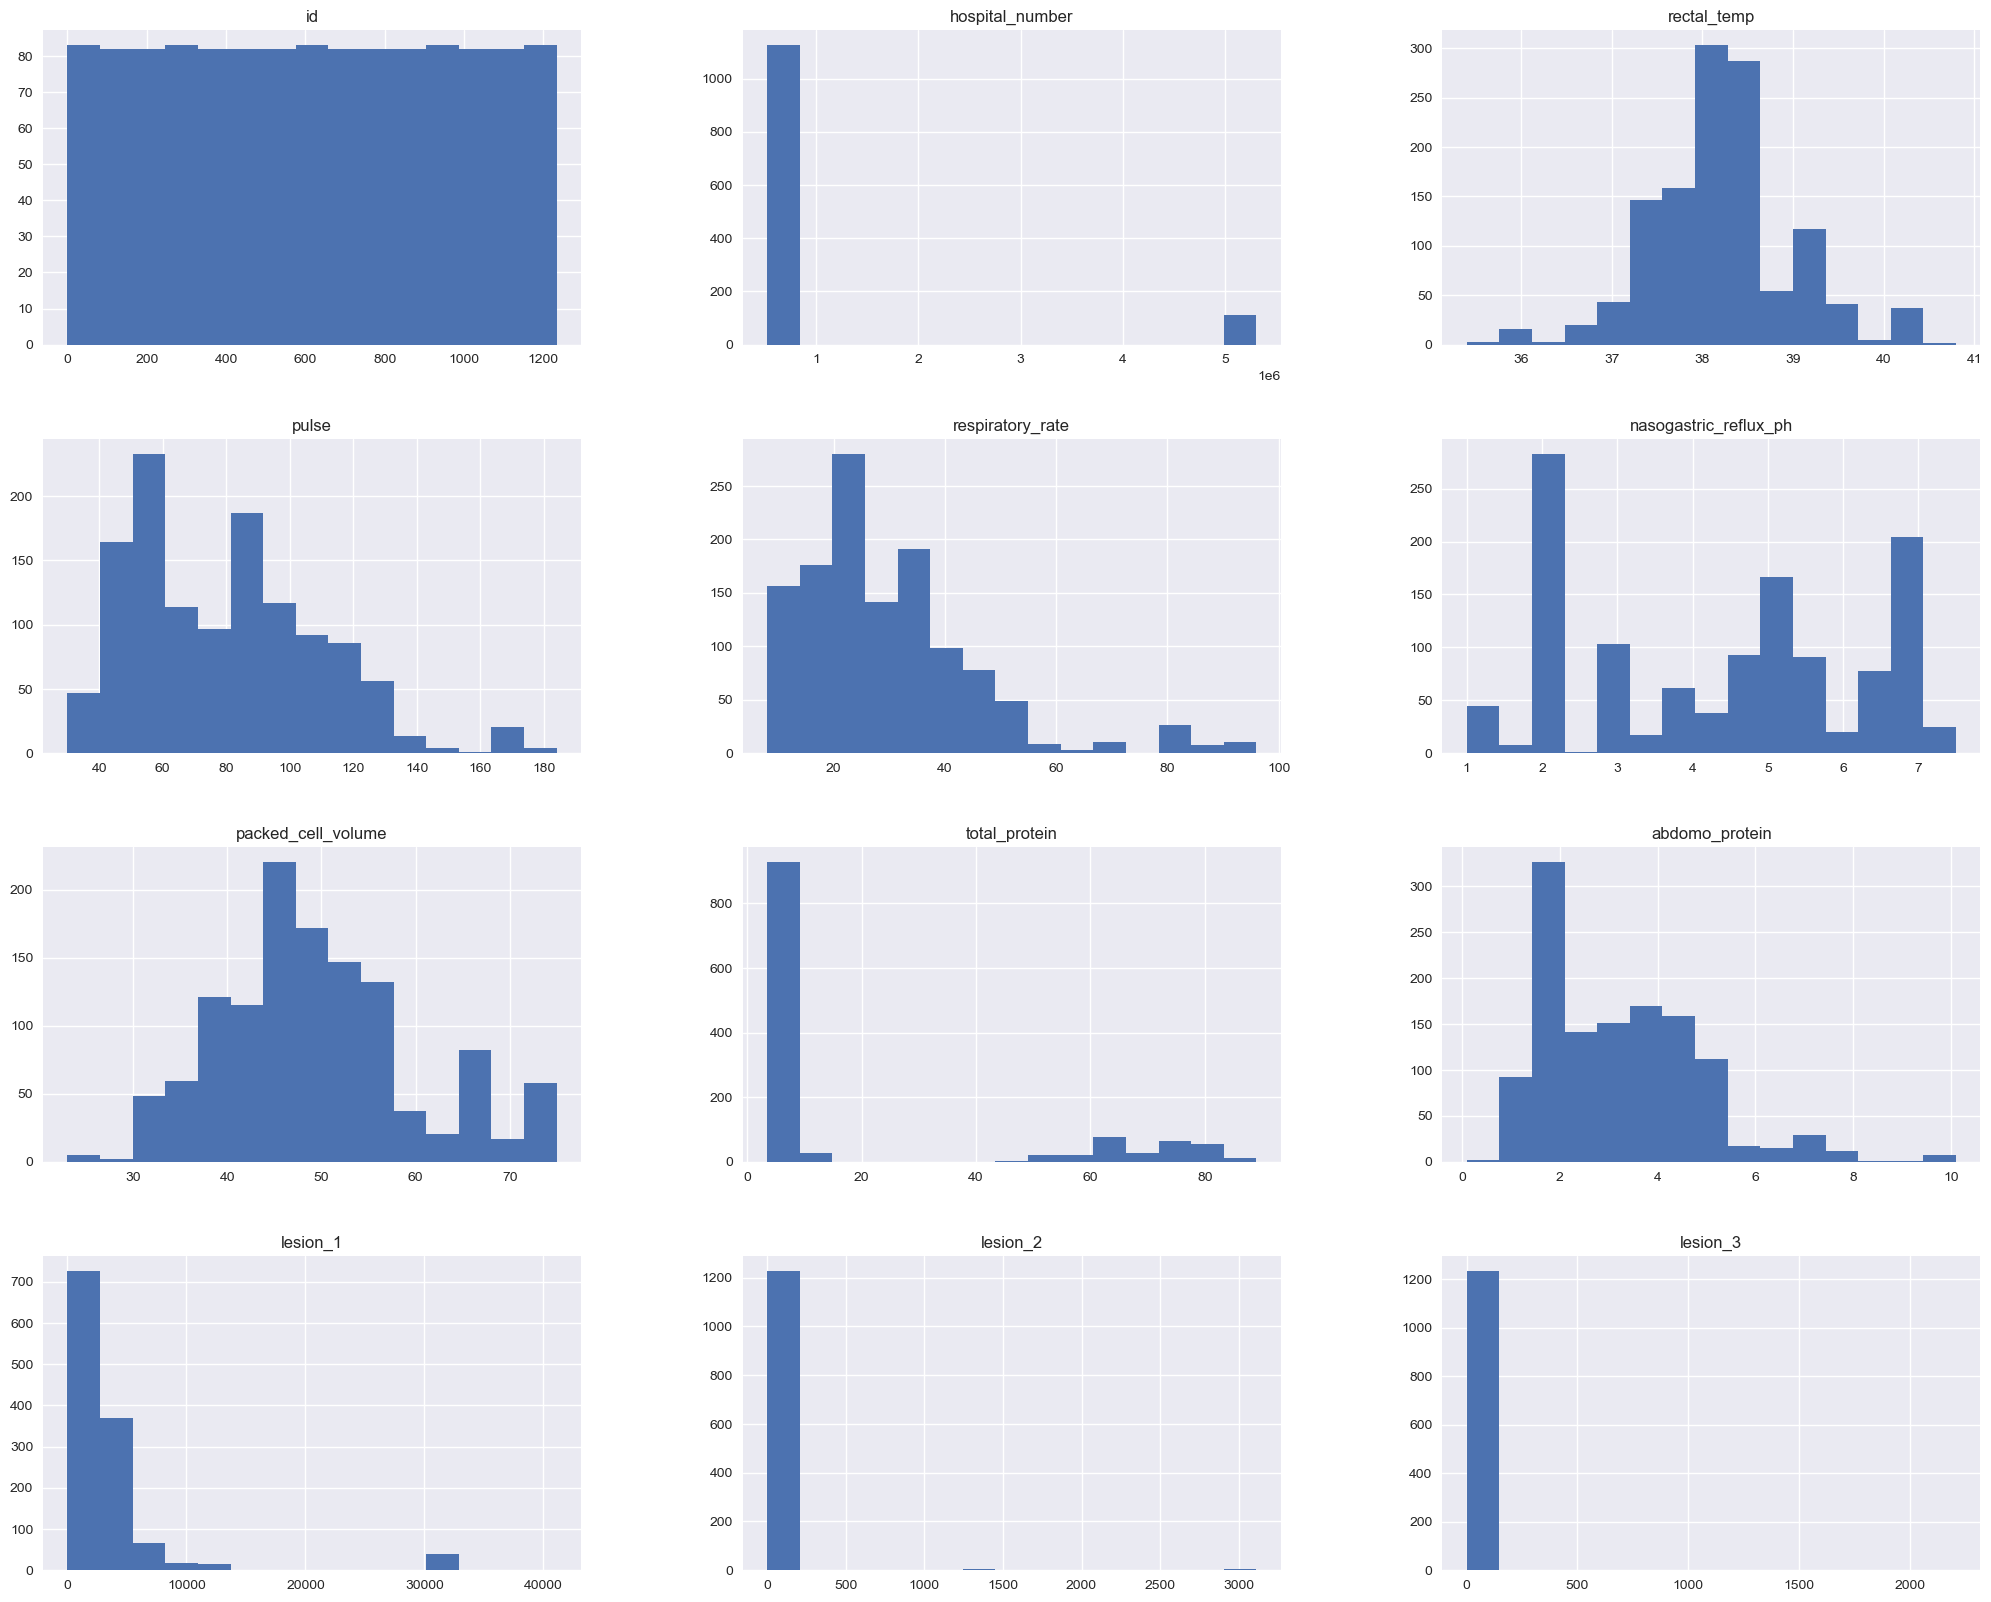

In [7]:
plt.style.use("seaborn")
df.hist(figsize=(25,20), bins=15)

In [8]:
df.describe()

,id,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,1235.0000,1.235000e+03,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,617.0000,9.545004e+05,38.202186,79.574089,30.054251,4.382591,49.602429,21.388016,3.290931,3832.496356,14.612146,3.577328
std,356.6581,1.356403e+06,0.788668,29.108638,16.452066,1.937357,10.535800,26.676453,1.589195,5436.733774,193.705735,88.858953
min,0.0000,5.213990e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.500000,0.100000,0.000000,0.000000,0.000000
25%,308.5000,5.288000e+05,37.800000,53.000000,18.000000,2.000000,43.000000,6.600000,2.000000,2205.000000,0.000000,0.000000
50%,617.0000,5.297770e+05,38.200000,76.000000,28.000000,4.500000,48.000000,7.500000,3.000000,2209.000000,0.000000,0.000000
75%,925.5000,5.341450e+05,38.600000,100.000000,36.000000,6.000000,57.000000,9.100000,4.300000,3205.000000,0.000000,0.000000
max,1234.0000,5.305129e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,3112.000000,2209.000000


In [9]:
# Are there any missing values?
df.isna().sum()

id                       0
surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
outcome                  0
dtype: int64

In [10]:
df.drop(['id'],axis = 1,inplace = True)

In [11]:
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [12]:
df['outcome'].unique()

array(['died', 'euthanized', 'lived'], dtype=object)

In [13]:
df['outcome'].value_counts()

lived         574
died          410
euthanized    251
Name: outcome, dtype: int64

<Axes: xlabel='outcome', ylabel='count'>

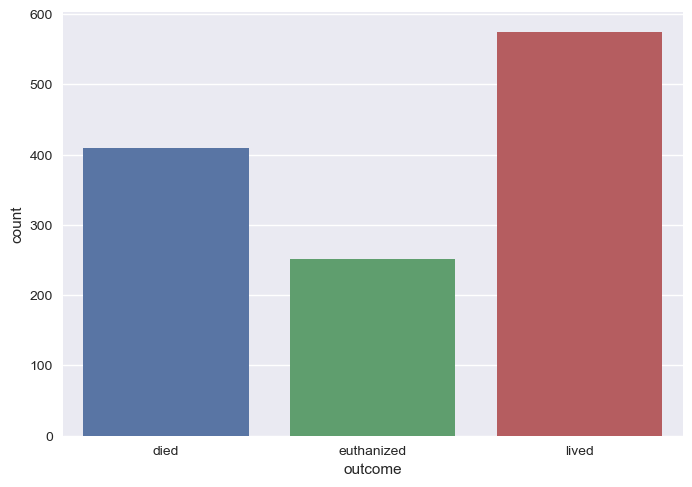

In [14]:
sns.countplot(x="outcome", data=df)

<Axes: ylabel='outcome'>

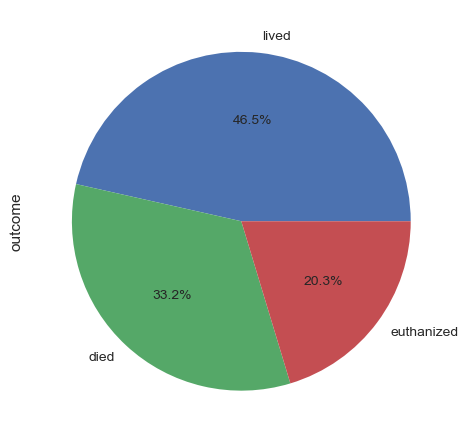

In [15]:
df['outcome'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [16]:
df['surgery'].unique() 

array(['yes', 'no'], dtype=object)

In [17]:
df['surgery'].value_counts()

yes    887
no     348
Name: surgery, dtype: int64

<Axes: xlabel='surgery', ylabel='count'>

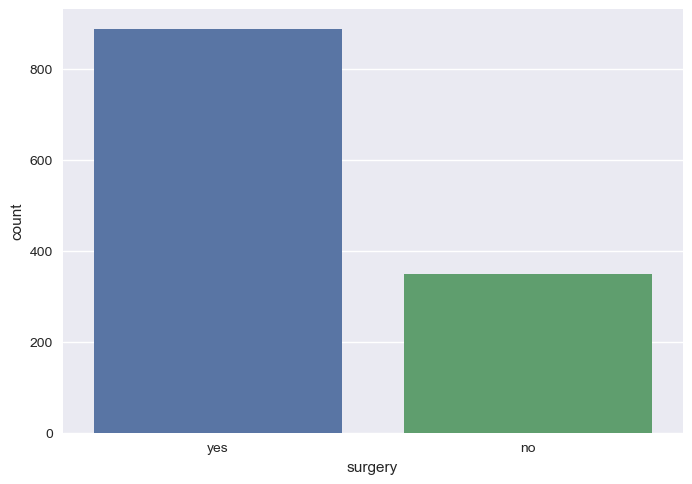

In [18]:
sns.countplot(x="surgery", data=df)

<Axes: ylabel='surgery'>

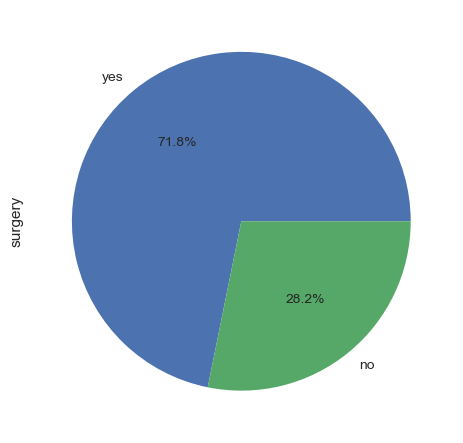

In [19]:
df['surgery'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [20]:
df['age'].unique() 

array(['adult', 'young'], dtype=object)

In [21]:
df['age'].value_counts()

adult    1160
young      75
Name: age, dtype: int64

<Axes: xlabel='age', ylabel='count'>

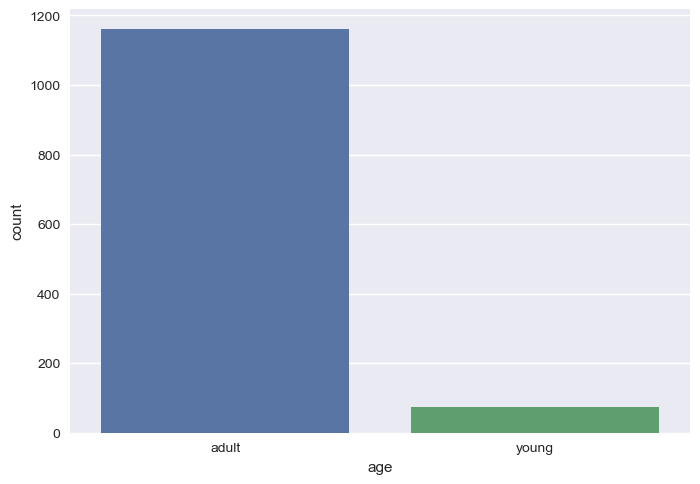

In [22]:
sns.countplot(x="age", data=df)

<Axes: ylabel='age'>

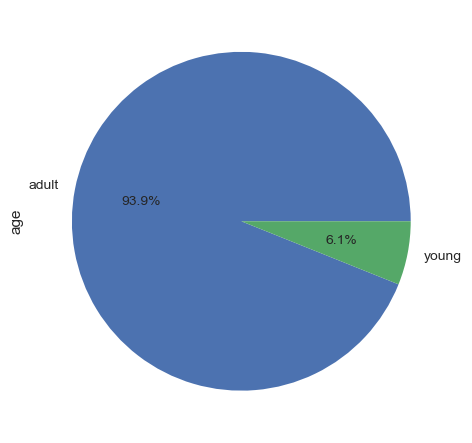

In [23]:
df['age'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [24]:
df['temp_of_extremities'].unique() 

array(['cool', 'cold', 'normal', 'warm', 'None'], dtype=object)

In [25]:
df['temp_of_extremities'].value_counts()

cool      700
normal    324
cold      121
warm       51
None       39
Name: temp_of_extremities, dtype: int64

<Axes: xlabel='temp_of_extremities', ylabel='count'>

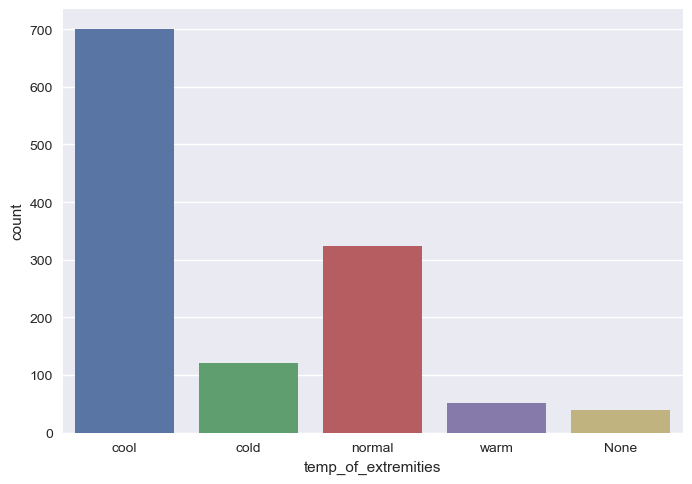

In [26]:
sns.countplot(x="temp_of_extremities", data=df)

<Axes: ylabel='temp_of_extremities'>

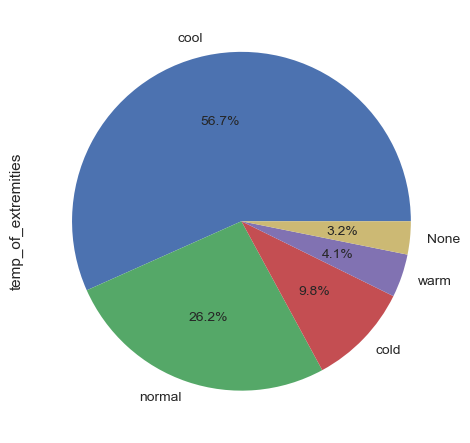

In [27]:
df['temp_of_extremities'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [28]:
df['abdomo_appearance'].unique() 

array(['serosanguious', 'cloudy', 'clear', 'None'], dtype=object)

In [29]:
df['abdomo_appearance'].value_counts()

serosanguious    570
cloudy           359
clear            258
None              48
Name: abdomo_appearance, dtype: int64

<Axes: xlabel='abdomo_appearance', ylabel='count'>

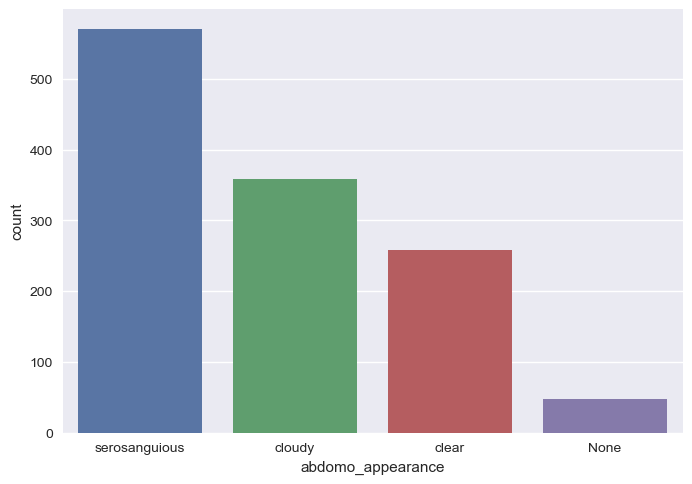

In [30]:
sns.countplot(x="abdomo_appearance", data=df)

<Axes: ylabel='abdomo_appearance'>

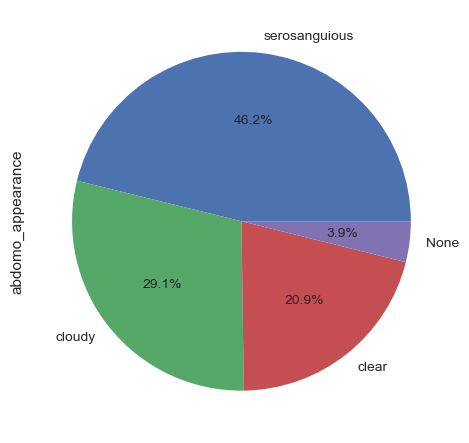

In [31]:
df['abdomo_appearance'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [32]:
df['peripheral_pulse'].unique() 

array(['reduced', 'normal', 'None', 'absent', 'increased'], dtype=object)

In [33]:
df['peripheral_pulse'].value_counts()

reduced      724
normal       429
None          60
absent        18
increased      4
Name: peripheral_pulse, dtype: int64

<Axes: xlabel='peripheral_pulse', ylabel='count'>

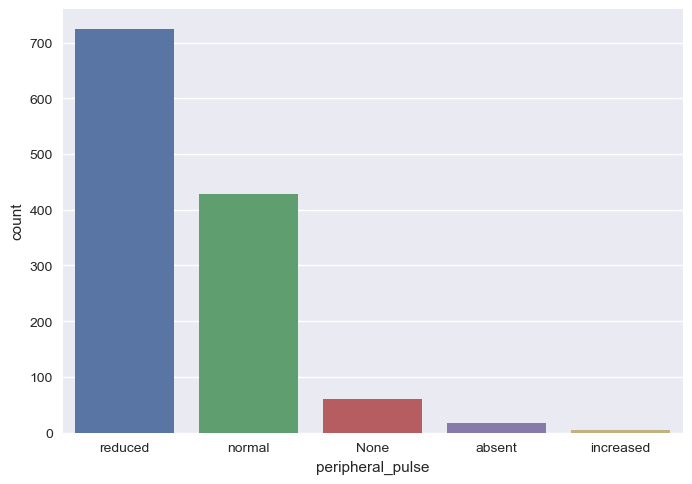

In [34]:
sns.countplot(x="peripheral_pulse", data=df)

<Axes: ylabel='peripheral_pulse'>

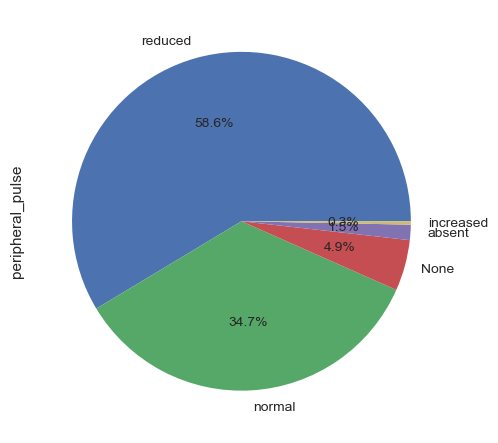

In [35]:
df['peripheral_pulse'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [36]:
# Make a correlation matrix
df.corr()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
hospital_number,1.000000,-0.002552,0.118391,0.085008,0.114354,-0.018028,-0.154746,0.141800,0.030844,0.022098,-0.012575
rectal_temp,-0.002552,1.000000,0.176761,0.124377,0.115980,0.088986,-0.060842,0.043342,0.021711,-0.022823,-0.005220
pulse,0.118391,0.176761,1.000000,0.395130,-0.010132,0.435102,0.004373,0.056391,0.000037,0.021804,0.028273
respiratory_rate,0.085008,0.124377,0.395130,1.000000,0.003854,0.188777,0.004018,0.004287,0.020502,-0.010536,0.009663
nasogastric_reflux_ph,0.114354,0.115980,-0.010132,0.003854,1.000000,-0.101066,-0.583299,0.433006,0.052951,-0.029683,-0.024594
packed_cell_volume,-0.018028,0.088986,0.435102,0.188777,-0.101066,1.000000,0.176178,-0.059655,-0.083784,0.050659,0.051235
total_protein,-0.154746,-0.060842,0.004373,0.004018,-0.583299,0.176178,1.000000,-0.469784,-0.105598,0.044565,0.020635
abdomo_protein,0.141800,0.043342,0.056391,0.004287,0.433006,-0.059655,-0.469784,1.000000,0.050051,0.002571,-0.022588
lesion_1,0.030844,0.021711,0.000037,0.020502,0.052951,-0.083784,-0.105598,0.050051,1.000000,-0.007595,0.002761
lesion_2,0.022098,-0.022823,0.021804,-0.010536,-0.029683,0.050659,0.044565,0.002571,-0.007595,1.000000,0.644054


(11.5, -0.5)

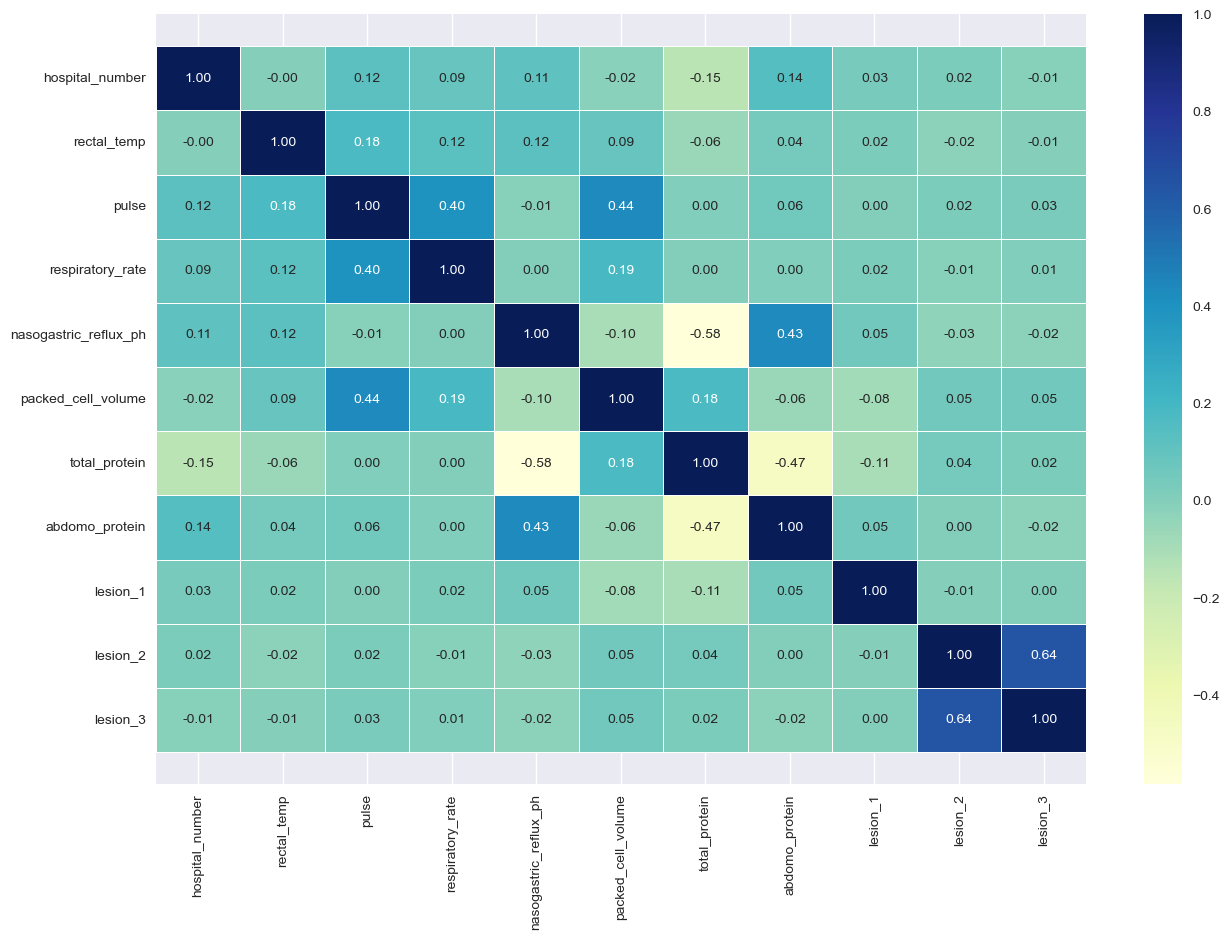

In [37]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                1235 non-null   object 
 1   age                    1235 non-null   object 
 2   hospital_number        1235 non-null   int64  
 3   rectal_temp            1235 non-null   float64
 4   pulse                  1235 non-null   float64
 5   respiratory_rate       1235 non-null   float64
 6   temp_of_extremities    1235 non-null   object 
 7   peripheral_pulse       1235 non-null   object 
 8   mucous_membrane        1235 non-null   object 
 9   capillary_refill_time  1235 non-null   object 
 10  pain                   1235 non-null   object 
 11  peristalsis            1235 non-null   object 
 12  abdominal_distention   1235 non-null   object 
 13  nasogastric_tube       1235 non-null   object 
 14  nasogastric_reflux     1235 non-null   object 
 15  naso

In [39]:
df.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data', 'outcome'],
      dtype='object')

### Modeling

In [60]:
from sklearn.preprocessing import LabelEncoder

Lb = LabelEncoder()

df['surgical_lesion']  = Lb.fit_transform(df['surgical_lesion'])
df['surgery']  = Lb.fit_transform(df['surgery'])
df['age']  = Lb.fit_transform(df['age'])
df['temp_of_extremities']  = Lb.fit_transform(df['temp_of_extremities'])
df['peripheral_pulse']  = Lb.fit_transform(df['peripheral_pulse'])
df['mucous_membrane']  = Lb.fit_transform(df['mucous_membrane'])
df['capillary_refill_time']  = Lb.fit_transform(df['capillary_refill_time'])
df['pain']  = Lb.fit_transform(df['pain'])
df['peristalsis']  = Lb.fit_transform(df['peristalsis'])
df['abdominal_distention']  = Lb.fit_transform(df['abdominal_distention'])
df['nasogastric_tube']  = Lb.fit_transform(df['nasogastric_tube'])
df['nasogastric_reflux']  = Lb.fit_transform(df['nasogastric_reflux'])
df['rectal_exam_feces']  = Lb.fit_transform(df['rectal_exam_feces'])
df['abdomen']  = Lb.fit_transform(df['abdomen'])
df['cp_data']  = Lb.fit_transform(df['cp_data'])
df['outcome']  = Lb.fit_transform(df['outcome'])
df['abdomo_appearance']  = Lb.fit_transform(df['abdomo_appearance'])

In [56]:
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,1,0,530001,38.1,132.0,24.0,2,4,3,3,...,57.0,8.5,3,20,1,2209,0,0,0,0
1,1,0,533836,37.5,88.0,12.0,2,3,5,3,...,33.0,64.0,3,7,1,2208,0,0,0,1
2,1,0,529812,38.3,120.0,28.0,2,4,6,2,...,37.0,6.4,3,20,1,5124,0,0,0,2
3,1,0,5262541,37.1,72.0,30.0,1,4,6,3,...,53.0,7.0,2,24,1,2208,0,0,1,2
4,0,0,5299629,38.0,52.0,48.0,3,3,4,2,...,47.0,7.3,2,13,0,0,0,0,1,2


### Modeling

In [61]:
# Split data into X and y
X = df.drop("outcome", axis=1)

y = df["outcome"]

In [62]:
X

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,1,0,530001,38.1,132.0,24.0,2,4,3,3,...,2,57.0,8.5,3,20,1,2209,0,0,0
1,1,0,533836,37.5,88.0,12.0,2,3,5,3,...,2,33.0,64.0,3,7,1,2208,0,0,0
2,1,0,529812,38.3,120.0,28.0,2,4,6,2,...,1,37.0,6.4,3,20,1,5124,0,0,0
3,1,0,5262541,37.1,72.0,30.0,1,4,6,3,...,2,53.0,7.0,2,24,1,2208,0,0,1
4,0,0,5299629,38.0,52.0,48.0,3,3,4,2,...,4,47.0,7.3,2,13,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1,0,535246,38.5,129.0,48.0,2,4,6,3,...,1,57.0,66.0,3,7,1,2206,0,0,0
1231,1,0,528570,37.5,60.0,50.0,2,4,5,2,...,2,35.0,6.4,3,22,1,2209,0,0,1
1232,1,1,529685,37.5,84.0,40.0,3,4,4,2,...,3,40.0,5.9,2,44,1,400,0,0,1
1233,1,0,534784,38.1,70.0,16.0,3,4,2,2,...,2,58.0,74.0,2,7,1,2209,0,0,0


In [63]:
y

0       0
1       1
2       2
3       2
4       2
       ..
1230    2
1231    0
1232    2
1233    2
1234    2
Name: outcome, Length: 1235, dtype: int64

In [64]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_val, y_train, y_val = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [69]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          #"Random Forest": RandomForestClassifier(),
         #"Xgboost": xgb
}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_val, y_train, y_val):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_val, y_val)
    return model_scores

In [70]:
# model_scores = fit_and_score(models=models,
#                              X_train=X_train,
#                              X_val=X_val,
#                              y_train=y_train,
#                              y_val=y_val)

# model_scores

AttributeError: 'Flags' object has no attribute 'c_contiguous'